# NBA Player Shot Charts

In [ ]:
import pandas as pd
from nba_api.stats.endpoints import shotchartdetail
from nba_api.stats.static import players

In [ ]:
# Search for the player by name
player_name = "Jalen Brunson"
player_info = players.find_players_by_full_name(player_name)
player_id = player_info[0]['id']

In [ ]:
# Fetch shot data for the 2023-24 NBA season
shot_data = shotchartdetail.ShotChartDetail(
    team_id=0,
    player_id=player_id,
    season_nullable='2023-24',
    season_type_all_star='Regular Season',
    context_measure_simple='FGA'
)

# Convert the shot data into a DataFrame
shot_df = shot_data.get_data_frames()[0]
shot_df.head()  # Show the first few rows

print(shot_df.columns)  # Show the data types of each column
shot_df['SHOT_TYPE'].value_counts()  # Count the number of each shot type

In [ ]:
# Get relevant totals statistics
total_shots = shot_df.shape[0]
total_makes = shot_df[shot_df['SHOT_MADE_FLAG'] == 1].shape[0]
total_make_percentage = total_makes / total_shots

In [ ]:
# Get statistics for 3-point shots
three_point_shots = shot_df[shot_df['SHOT_TYPE'] == '3PT Field Goal']
three_point_makes = three_point_shots[three_point_shots['SHOT_MADE_FLAG'] == 1]
# print(three_point_makes.shape[0], three_point_shots.shape[0])
three_point_percentage = three_point_makes.shape[0] / three_point_shots.shape[0]
threes_percent = str(round(three_point_percentage * 100, 1)) + '%'

# Get statistics for 2-point shots
two_point_shots = shot_df[shot_df['SHOT_TYPE'] == '2PT Field Goal']
two_point_makes = two_point_shots[two_point_shots['SHOT_MADE_FLAG'] == 1]
# print(two_point_makes.shape[0], two_point_shots.shape[0])
two_point_percentage = two_point_makes.shape[0] / two_point_shots.shape[0]
twos_percent = str(round(two_point_percentage * 100, 1)) + '%'

In [ ]:
# Get the average shot distance
point_average_distance = shot_df['SHOT_DISTANCE'].mean()
point_average_distance = round(point_average_distance, 1)
#print(f"average shot distance: {point_average_distance}")

In [301]:
# Define styles for the plot
background_color = "#0C0D0E"

# TODO: change font
import matplotlib.font_manager as font_manager
font_path = 'assets/Arvo-Regular.ttf'
font_props = font_manager.FontProperties(fname=font_path)

font_path_bold = 'assets/Arvo-Bold.ttf'
font_props_bold = font_manager.FontProperties(fname=font_path_bold)

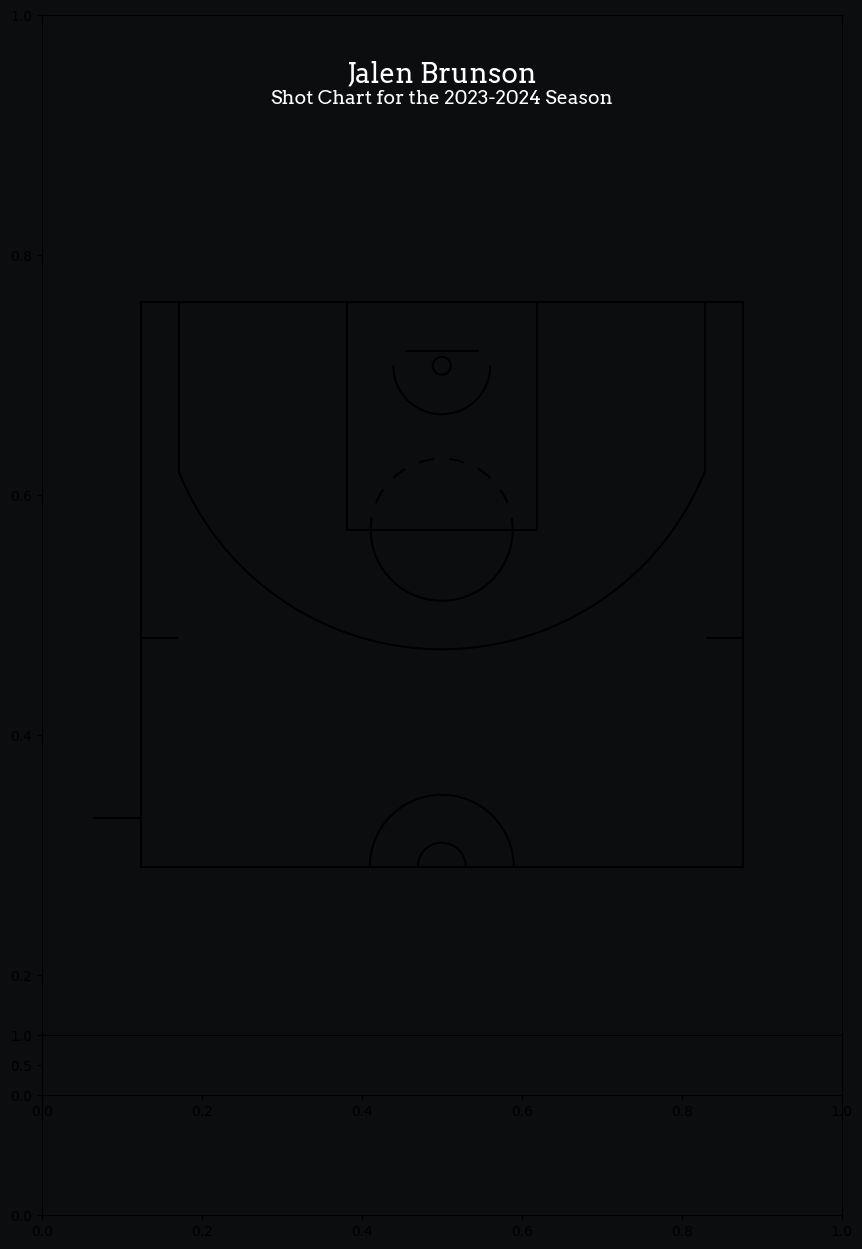

In [331]:
from mplbasketball import court

fig = plt.figure(figsize=(8, 12), facecolor=background_color)
# fig.patch.set_facecolor(background_color)

ax1 = fig.add_axes([0, 0.1, 1, 1], facecolor=background_color)
ax1.set_xlim(0, 1)
ax1.set_ylim(0, 1)

ax1.text(0.5, 0.95, f"{player_name}", fontproperties=font_props, fontsize=20, ha='center', va='center', color='white')
ax1.text(0.5, 0.93, s="Shot Chart for the 2023-2024 Season", fontproperties=font_props, fontsize=14, ha='center', va='center', color='white')


ax2 = fig.add_axes([.05, .25, .9, .8], facecolor=background_color)


court = Court(court_type="nba", origin="center", units="ft")
court.draw(ax=ax2, orientation="vu")


ax3 = fig.add_axes([0, .2, 1, .05], facecolor=background_color)

In [ ]:
import matplotlib.pyplot as plt

# Create a scatter plot for the shot locations
plt.figure(figsize=(10, 7))
plt.scatter(shot_df['LOC_X'], shot_df['LOC_Y'], c=shot_df['SHOT_MADE_FLAG'], cmap='coolwarm', s=100)
plt.xlim(-250, 250)  # NBA court width is approximately 500 units (from -250 to 250)
plt.ylim(-47.5, 422.5)  # NBA court length is approximately 470 units (half-court view)
plt.title(f"{player_name} Shot Chart (2023-2024)")
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

def draw_colored_court(ax=None, lw=2):
    """
    Draw a half-court basketball court with improved visuals and colors.
    """
    if ax is None:
        ax = plt.gca()

    # Court elements colors
    court_color = "#4d4d4d"  # Dark gray for court lines
    hoop_color = "#d62728"  # Red for hoop
    paint_color = "#1f77b4"  # Blue for the paint (key area)
    
    # Hoop
    hoop = plt.Circle((0, 0), radius=7.5, linewidth=lw, color=court_color, fill=False)

    # Backboard
    backboard = plt.Rectangle((-30, -7.5), 60, 1, linewidth=lw, color=court_color)

    # Paint area (key)
    paint = plt.Rectangle((-80, -47.5), 160, 190, linewidth=lw, color=court_color, fill=False)

    # Free-throw circle
    free_throw_top = plt.Circle((0, 142.5), radius=60, linewidth=lw, color=court_color, fill=False)
    free_throw_bottom = plt.Circle((0, 142.5), radius=60, linewidth=lw, color=court_color, fill=False, linestyle='dashed')

    # Restricted area arc
    restricted_area = plt.Circle((0, 0), radius=40, linewidth=lw, color=court_color, fill=False)

    # Three-point line (arc and straight lines)
    three_point_arc = patches.Arc((0, 0), 475, 475, theta1=22, theta2=157, linewidth=lw, color=court_color)  # Arc
    three_point_side1 = plt.Line2D([-220, -220], [-47.5, 92.5], linewidth=lw, color=court_color)  # Left corner
    three_point_side2 = plt.Line2D([220, 220], [-47.5, 92.5], linewidth=lw, color=court_color)  # Right corner

    # Adding the elements to the axes
    ax.add_patch(hoop)
    ax.add_patch(backboard)
    ax.add_patch(paint)
    ax.add_patch(free_throw_top)
    ax.add_patch(free_throw_bottom)
    ax.add_patch(restricted_area)
    ax.add_patch(three_point_arc)
    ax.add_line(three_point_side1)
    ax.add_line(three_point_side2)

    # Set court boundaries and remove axes
    ax.set_xlim(-250, 250)
    ax.set_ylim(-47.5, 422.5)
    ax.set_aspect(1)
    ax.axis('off')

    return ax


/var/folders/w6/f0qyl4rd7v789m3kymvy95vc0000gn/T/ipykernel_57125/3641708616.py:17: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(missed_shots['LOC_X'], missed_shots['LOC_Y'], c='#d62728', marker='x', s=100, edgecolors='black', label='Missed Shots', zorder=2)


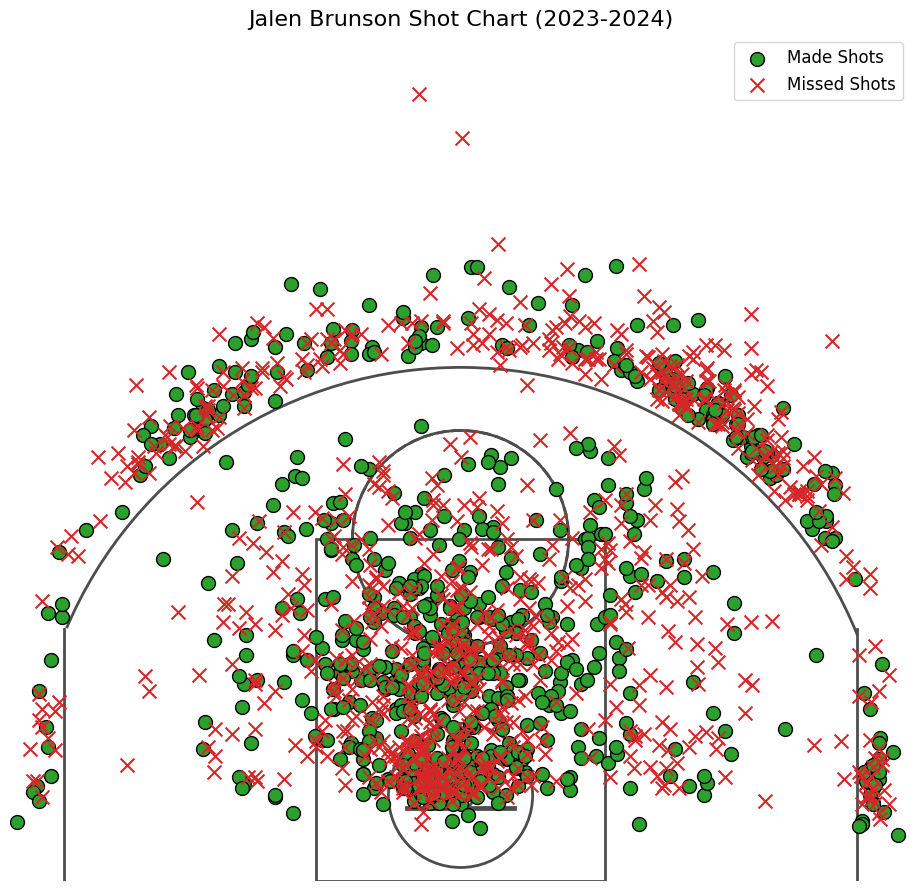

In [273]:
# Filter for made shots (SHOT_MADE_FLAG == 1)
made_shots = shot_df[shot_df['SHOT_MADE_FLAG'] == 1]

# Filter for missed shots (SHOT_ATTEMPTED_FLAG == 1 but SHOT_MADE_FLAG is missing or not 1)
missed_shots = shot_df[(shot_df['SHOT_ATTEMPTED_FLAG'] == 1) & (~shot_df['SHOT_MADE_FLAG'].astype(bool))]

# Plot the made and missed shots
fig, ax = plt.subplots(figsize=(12, 11))

# Draw the basketball court
draw_colored_court(ax)

# Plot made shots (green circles)
ax.scatter(made_shots['LOC_X'], made_shots['LOC_Y'], c='#2ca02c', marker='o', s=100, edgecolors='black', label='Made Shots', zorder=2)

# Plot missed shots (red crosses)
ax.scatter(missed_shots['LOC_X'], missed_shots['LOC_Y'], c='#d62728', marker='x', s=100, edgecolors='black', label='Missed Shots', zorder=2)

# Add title and legend
ax.set_title(f"{player_name} Shot Chart (2023-2024)", fontsize=16)
ax.legend(loc='upper right', fontsize=12)

# Show the plot
plt.show()


In [ ]:
import matplotlib.pyplot as plt
from mplbasketball import Court

# Draw the basketball court using mplbasketball
#court = Court(court_type="nba", origin="center", units="ft")
#fig, ax = court.draw(orientation="vu")
